<a href="https://colab.research.google.com/github/julianflowers/spha/blob/main/Amr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
install.packages('pak')
library(pak)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
pak("tidyverse")
pak::pkg_install("ropensci/fingertipsR")

 

✔ All system requirements are already installed.

  

ℹ No downloads are needed

✔ 1 pkg + 103 deps: kept 100 [2.6s]

 

✔ All system requirements are already installed.

  

ℹ No downloads are needed

✔ 1 pkg + 64 deps: kept 65 [2.1s]



In [26]:
  library(fingertipsR)
  library(tidyverse)

In [27]:
profiles() |>
  filter(str_detect(ProfileName, "AMR"))

amr_ind <- indicators(DomainID = 1938132908)

amr_ind_id <- amr_ind$IndicatorID

ProfileID,ProfileName,DomainID,DomainName
<int>,<chr>,<int>,<chr>
101,AMR local indicators - produced by the UKHSA,1938133070,Supporting NHS England Initiatives
101,AMR local indicators - produced by the UKHSA,1938132908,Antimicrobial Resistance
101,AMR local indicators - produced by the UKHSA,1938132909,Antibiotic Prescribing
101,AMR local indicators - produced by the UKHSA,1938132910,Health Care Associated Infection
101,AMR local indicators - produced by the UKHSA,1938132917,Infection Prevention and Control
101,AMR local indicators - produced by the UKHSA,1938132929,Antimicrobial Stewardship
101,AMR local indicators - produced by the UKHSA,1938132967,All Trust
101,AMR local indicators - produced by the UKHSA,1938132968,All Clinical Commissioning Group


In [28]:
amr_metadata <- fingertipsR::indicator_metadata(IndicatorID = amr_ind_id)
amr_metadata

IndicatorID,Indicator,Definition,Rationale,Data source,Indicator source,Methodology,Standard population/values,Confidence interval details,Source of numerator,⋯,Indicator Content,Specific rationale,Simple Name,Simple Definition,Impact of COVID-19,Unit,Value type,Year type,Polarity,Date updated
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
92021,Percentage of E. coli blood specimens with susceptibility tests to a carbapenem; by quarter,"Percentage of E. coli blood specimens (from voluntary English laboratory surveillance) with susceptibility tests to a carbapenem; by ICB sub-location and by Quarter (2015 Q1 onwards).The testing ofE. coliblood specimens for carbapenem (meropenem/imipenem/ertapenem) susceptibility is recommended within the Standards for Microbiology Investigations (SMI) https://www.gov.uk/government/publications/smi-b-60-detection-of-bacteria-with-carbapenem-hydrolysing-lactamases-carbapenemases <a href=""https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/344071/P_8i1.1.pdf"">For this indicator, a higher value is indicative of increased carbapenem susceptibility testing.","This indicator demonstrates the proportion of initial specimens (first identified patientE. coli blood specimens) which have been tested for susceptibility to a carbapenem (meropenem/imipenem or ertapenem) in each ICB sub-location by quarter, in line with the guidance. Testing by ICB sub-location has been graded to green (100% of initial E.coliblood isolates), amber (70-99% isolates) and red for those where less than 70% have been tested (70% cut off used within the ESPAUR report 2014).",Routine voluntary laboratory surveillance reports to the UK Health Security Agency via the second generation surveillance system (SGSS); Antimicrobial testing data module,NA,The percentage of antibiotic susceptibility tests in initial reportedE. coli positive patient blood specimens in England. Total number of carbapenem (meropenem/imipenem or ertapenem) susceptibility tests on initial E. coli positive blood specimens isdivided by the aggregated total of initial E. coli positive blood specimens reported at the specified geography. Results are multiplied by 100 to be viewed as a percentage.,NA,No confidence intervals generated for this indicator,Voluntary laboratory reports ofEscherichia coli(E. coli) blood specimens made by English laboratories to the routine laboratory surveillance scheme and extracted from UKHSA's Second Generation Surveillance System (SGSS) antimicrobial testing module,⋯,NA,NA,NA,NA,NA,%,Proportion,Calendar,Not applicable,14/03/2024
92411,Percentage of E. coli blood specimens with susceptibility tests to a 3rd Generation Cephalosporin; by quarter,Percentage ofE. coli blood specimens (from English laboratories) with susceptibility tests to a 3rd Generation Cephalosporin (cefotaxime/ceftazidime/ceftriaxone/cefpodoxime); by ICB sub-location and by Quarter (2015 Q1 onwards). Third Generation Cephalosporin resistance in E. coli is a key combination highlighted as part of the government 5-year antimicrobial resistance strategy and as such is recommended for monitoring.,"This indicator demonstrates the quarterly proportions of initial specimens (first identified patientE. coli blood specimens) which have been tested for susceptibility to a 3rd Generation Cephalosporin by laboratories for patients in each ICB sub-location.Testing by ICB sub-location has been graded to green (100% of initial E.coliblood isolates), amber (70-99% isolates) and red for those where less than 70% have been tested (70% cut off used within the ESPAUR report 2014).",Routine Laboratory surveillance reports to the UK Health Security Agency via the second generation surveillance system (SGSS); antimicrobial testing data module.,NA,The percentage of antibiotic susceptibility tests in initial reportedE. colipositive patient blood specimens in England. Total number of 3rd Generation 

In [33]:
indicator_areatypes(IndicatorID = amr_ind_id[1])
area_types() |>
  filter(AreaTypeID == 66)

IndicatorID,AreaTypeID
<int>,<int>
92021,167
92021,66
92021,15


AreaTypeID,AreaTypeName,ParentAreaTypeID,ParentAreaTypeName
<int>,<chr>,<int>,<chr>
66,"Sub-ICB, former CCGs",221,"ICBs, former STPs"
66,"Sub-ICB, former CCGs",223,NHS regions (44 + 45)
66,"Sub-ICB, former CCGs",15,England


In [34]:
amr_data <- fingertips_data(IndicatorID = amr_ind_id, AreaTypeID = 66)

In [ ]:
pak("zoo")
library(zoo)

Warning message:
“Removed 1445 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


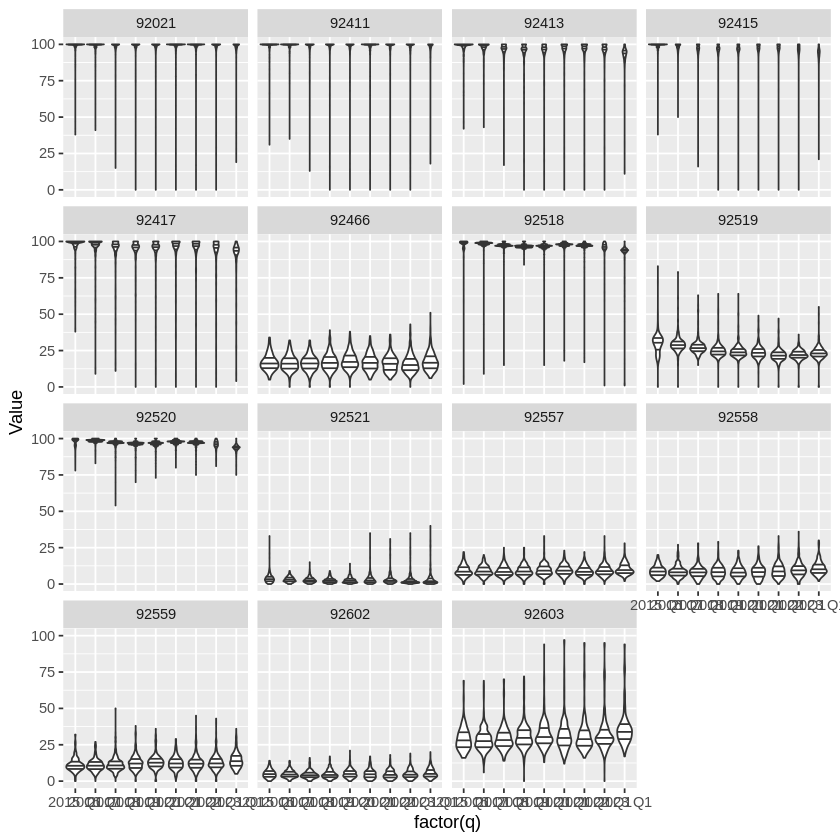

In [67]:
amr_data |>
  filter(str_detect(AreaType, "ICB")) |>
  #count(IndicatorID, Age, Sex, TimeperiodSortable)
  mutate(q = lubridate::make_date(year = as.numeric(str_sub(TimeperiodSortable, 1, 4))), month = as.numeric(str_sub(TimeperiodSortable, 5, 6)),
         q = zoo::as.yearqtr(q)) |>
  ggplot() +
  geom_violin(aes(factor(q), Value), draw_quantiles = c(.25, .5, .75)) +
  facet_wrap(~IndicatorID)


In [54]:
amr_data |>
  glimpse()

Rows: 55,854
Columns: 27
$ IndicatorID                         <int> 92021, 92021, 92021, 92021, 92021,…
$ IndicatorName                       <chr> "Percentage of E. coli blood speci…
$ ParentCode                          <chr> NA, "nE54000061", "nE54000026", "n…
$ ParentName                          <chr> NA, "NHS South Yorkshire Integrate…
$ AreaCode                            <chr> "E92000001", "nE38000006", "nE3800…
$ AreaName                            <chr> "England", "South Yorkshire ICB - …
$ AreaType                            <chr> "England", "ICB sub-locations", "I…
$ Sex                                 <chr> "Persons", "Persons", "Persons", "…
$ Age                                 <chr> "All ages", "All ages", "All ages"…
$ CategoryType                        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Category                            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Timeperiod                          <chr> "2015 Q1", "2015 Q1", "2015 Q1", "…
$ Value        